In [26]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os, os.path, shutil
from keras.preprocessing.image import img_to_array, ImageDataGenerator, array_to_img, load_img

In [2]:
#open first image as a test 
im = Image.open('data/Blight/Corn_Blight (1).jpg')
arr = np.array(im)

In [3]:
#prep for creating directories 
blight_dir = 'data/Blight/'
gray_dir = 'data/Gray_Leaf_Spot'
rust_dir = 'data/Common_Rust/'
healthy_dir = 'data/Healthy/'
new_dir = 'split/'

In [4]:
#grab image names for each type
imgs_blight = [file for file in os.listdir(blight_dir)]
imgs_gray = [file for file in os.listdir(gray_dir)]
imgs_rust = [file for file in os.listdir(rust_dir)]
imgs_healthy = [file for file in os.listdir(healthy_dir)]

In [5]:
imgs_blight[:5]

['Corn_Blight (1).jpg',
 'Corn_Blight (1146).jpg',
 'Corn_Blight (1147).jpg',
 'Corn_Blight (1148).jpg',
 'Corn_Blight (1149).jpg']

In [6]:
#Check to ensure all images are included
print('# Blight: ', len(imgs_blight))
print('# Gray: ', len(imgs_gray))
print('# Rust: ', len(imgs_rust))
print('# Healthy: ', len(imgs_healthy))

# Blight:  1146
# Gray:  574
# Rust:  1306
# Healthy:  1162


In [7]:
#os.mkdir(new_dir)

In [8]:
#create variables for new split directories for train/ test/ val
train_folder = os.path.join(new_dir, 'train')
train_blight = os.path.join(train_folder, 'blight')
train_gray = os.path.join(train_folder, 'gray')
train_rust = os.path.join(train_folder, 'rust')
train_healthy = os.path.join(train_folder, 'healthy')

test_folder = os.path.join(new_dir, 'test')
test_blight = os.path.join(test_folder, 'blight')
test_gray = os.path.join(test_folder, 'gray')
test_rust = os.path.join(test_folder, 'rust')
test_healthy = os.path.join(test_folder, 'healthy')

val_folder = os.path.join(new_dir, 'validation')
val_blight = os.path.join(val_folder, 'blight')
val_gray = os.path.join(val_folder, 'gray')
val_rust = os.path.join(val_folder, 'rust')
val_healthy = os.path.join(val_folder, 'healthy')

In [9]:
#create directories for splits
#os.mkdir(train_folder)
#os.mkdir(train_blight)
#os.mkdir(train_gray)
#os.mkdir(train_rust)
#os.mkdir(train_healthy)

#os.mkdir(test_folder)
#os.mkdir(test_blight)
#os.mkdir(test_gray)
#os.mkdir(test_rust)
#os.mkdir(test_healthy)

#os.mkdir(val_folder)
#os.mkdir(val_blight)
#os.mkdir(val_gray)
#os.mkdir(val_rust)
#os.mkdir(val_healthy)

In [10]:
#use a 74/13/13 split for train/ test/ val 
print('Number of images to train:')
print('# Blight: ', round(len(imgs_blight)*.74))
print('# Gray: ', round(len(imgs_gray)*.74))
print('# Rust: ', round(len(imgs_rust)*.74))
print('# Healthy: ', round(len(imgs_healthy)*.74))

#use a 74/13/13 split for train/ test/ val 
print('Number of images to test/val:')
print('# Blight: ', round(len(imgs_blight)*.13))
print('# Gray: ', round(len(imgs_gray)*.13))
print('# Rust: ', round(len(imgs_rust)*.13))
print('# Healthy: ', round(len(imgs_healthy)*.13))

Number of images to train:
# Blight:  848
# Gray:  425
# Rust:  966
# Healthy:  860
Number of images to test/val:
# Blight:  149
# Gray:  75
# Rust:  170
# Healthy:  151


In [11]:
# train blight
# imgs = imgs_blight[:848]
# for img in imgs:
#     origin = os.path.join(blight_dir, img)
#     destination = os.path.join(train_blight, img)
#     shutil.copyfile(origin, destination)
    
# train grey
# imgs = imgs_gray[:425]
# for img in imgs:
#     origin = os.path.join(gray_dir, img)
#     destination = os.path.join(train_gray, img)
#     shutil.copyfile(origin, destination)
    
# train rust
# imgs = imgs_rust[:966]
# for img in imgs:
#     origin = os.path.join(rust_dir, img)
#     destination = os.path.join(train_rust, img)
#     shutil.copyfile(origin, destination)
    
# train healthy
# imgs = imgs_healthy[:860]
# for img in imgs:
#     origin = os.path.join(healthy_dir, img)
#     destination = os.path.join(train_healthy, img)
#     shutil.copyfile(origin, destination)

In [12]:
# test blight
# imgs = imgs_blight[848:997]
# for img in imgs:
#     origin = os.path.join(blight_dir, img)
#     destination = os.path.join(test_blight, img)
#     shutil.copyfile(origin, destination)
    
# # test grey
# imgs = imgs_gray[425:500]
# for img in imgs:
#     origin = os.path.join(gray_dir, img)
#     destination = os.path.join(test_gray, img)
#     shutil.copyfile(origin, destination)
    
# # test rust
# imgs = imgs_rust[966:1136]
# for img in imgs:
#     origin = os.path.join(rust_dir, img)
#     destination = os.path.join(test_rust, img)
#     shutil.copyfile(origin, destination)
    
# # test healthy
# imgs = imgs_healthy[860:1011]
# for img in imgs:
#     origin = os.path.join(healthy_dir, img)
#     destination = os.path.join(test_healthy, img)
#     shutil.copyfile(origin, destination)

In [13]:
# # val blight
# imgs = imgs_blight[997:]
# for img in imgs:
#     origin = os.path.join(blight_dir, img)
#     destination = os.path.join(val_blight, img)
#     shutil.copyfile(origin, destination)
    
# # val grey
# imgs = imgs_gray[500:]
# for img in imgs:
#     origin = os.path.join(gray_dir, img)
#     destination = os.path.join(val_gray, img)
#     shutil.copyfile(origin, destination)
    
# # val rust
# imgs = imgs_rust[1136:]
# for img in imgs:
#     origin = os.path.join(rust_dir, img)
#     destination = os.path.join(val_rust, img)
#     shutil.copyfile(origin, destination)
    
# # val healthy
# imgs = imgs_healthy[1011:]
# for img in imgs:
#     origin = os.path.join(healthy_dir, img)
#     destination = os.path.join(val_healthy, img)
#     shutil.copyfile(origin, destination)

In [19]:
#reshape all images
test_batch = 545
val_batch = 544
train_batch = 3099

# get all test images and reshape 
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(64, 64),
                                                                        batch_size = test_batch) 

# get all validation images and reshape 
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder, target_size=(64, 64), 
                                                                      batch_size = val_batch)

# get all train images and reshape 
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(train_folder, target_size=(64, 64),
                                                                        batch_size = train_batch)

Found 545 images belonging to 4 classes.
Found 544 images belonging to 4 classes.
Found 3099 images belonging to 4 classes.


In [20]:
#create images/ labels
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [21]:
train_images.shape[0]

3099

In [23]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

#double check shape to make sure all the images are included
print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(3099, 12288)
(545, 12288)
(544, 12288)


In [24]:
#create labels for all three splits
train_y = np.reshape(train_labels[:,0], (3099,1))
test_y = np.reshape(test_labels[:,0], (545,1))
val_y = np.reshape(val_labels[:,0], (544,1))

### Baseline Model - No Tuning

In [27]:
#create a dense layer model as a baseline with 2 hidden layers
np.random.seed(10)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
#choose metrics and fit the model on train data
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=45,
                    validation_data=(val_img, val_y))

Epoch 1/50
69/69 [==============================] - 1s 9ms/step - loss: 0.2416 - accuracy: 0.8922 - val_loss: 0.4524 - val_accuracy: 0.8033
Epoch 2/50
69/69 [==============================] - 0s 6ms/step - loss: 0.2340 - accuracy: 0.9000 - val_loss: 0.3922 - val_accuracy: 0.8217
Epoch 3/50
69/69 [==============================] - 0s 6ms/step - loss: 0.2241 - accuracy: 0.9016 - val_loss: 0.3832 - val_accuracy: 0.8364
Epoch 4/50
69/69 [==============================] - 0s 7ms/step - loss: 0.2283 - accuracy: 0.8993 - val_loss: 0.5503 - val_accuracy: 0.7463
Epoch 5/50
69/69 [==============================] - 0s 7ms/step - loss: 0.2351 - accuracy: 0.8958 - val_loss: 0.3843 - val_accuracy: 0.8364
Epoch 6/50
69/69 [==============================] - 0s 6ms/step - loss: 0.2242 - accuracy: 0.9006 - val_loss: 0.4204 - val_accuracy: 0.8217
Epoch 7/50
69/69 [==============================] - 0s 7ms/step - loss: 0.2585 - accuracy: 0.8816 - val_loss: 0.4549 - val_accuracy: 0.8254
Epoch 8/50
69/69 [==

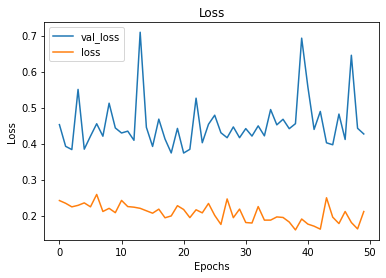

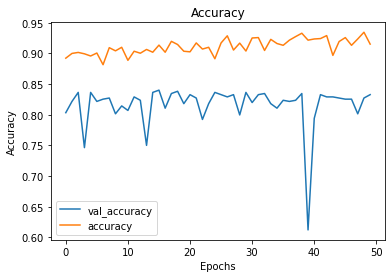

In [31]:
def viz_train_res(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
viz_train_res(history)